## KING COUNTY HOUSE SALES ANALYSIS
### Project: Housing Market Analysis
#### Dataset used: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv




Project Introduction: Welcome to my analysis of the King County housing dataset from Kaggle! This dataset offers an intriguing look into residential property sales in the Seattle area, featuring 21 columns and over 21,000 rows of data. It covers house sales from 2014 to 2015, providing insights into various factors like home size, number of bedrooms and bathrooms, property condition, and location.

The aim of this analysis is to uncover what drives housing prices in this dynamic market, offering valuable insights for buyers, real estate investors, and policymakers. With the housing market in King County experiencing significant changes influenced by economic and community trends, I aim to identify patterns that can help people make informed decisions.

Through this exploratory data analysis, I’ll dive into visualizations and statistics to highlight interesting trends and correlations. Let’s see what we can discover about the King County housing market!


In [211]:
#Making all necessary importations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import collections
from datetime import datetime
%matplotlib inline

### Data Wrangling
>In this section, I will load in the data, check for cleanliness, identify what to clean, and then trim and clean the dataset for analysis.


In [212]:
#Importing the dataset i'd be working with

df = pd.read_csv("kc_house_data_NaN.csv")


In [213]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [214]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [215]:
df.describe()



,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Each row represents a unique sale of a residential property in King Couty USA within the year 2014 to 2015. Since i would be prforming an EDA,  I would go ahead to drop some non critical columns in the dataset, such as the ID column, long, lat, sqft_living15 and sqft_lot15.



In [216]:
df.drop(['id', 'long','lat','sqft_living15','sqft_lot15'], axis=1, inplace= True)

In [217]:
df.drop(['Unnamed: 0'], axis= 1, inplace = True)


AFter dropping the columns not significant to my analysis, i'd go ahead to scrutinize my dataset further, to know if there are any missing values, wrongly filled data points,columns in the wrong data type or any formattig problem in general

In [218]:
df.columns
df.isna().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
dtype: int64

The bathroom and bedroom columns have about 10 missing datapoints, let me check them out

In [219]:
df[['bedrooms','bathrooms']].describe()

,bedrooms,bathrooms
count,21600.000000,21603.000000
mean,3.372870,2.115736
std,0.926657,0.768996
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


The missing values are very litle, and do not hold any consequence to our analysis, so i'd just fill it in with the mean.

In [220]:
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)

C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\1015595643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)
C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\1015595643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [221]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

Now, all missing values are dealt with, i will go ahead to check the datatype format of the columns, duplicates, and inconsistencies in the data

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.6+ MB


This dataset contains majorly quantitative values, but the date column is saved as an object datatype which shouldn't be, i"d go ahead to correct that.

In [223]:
df['date'] = pd.to_datetime(df['date'])

In [224]:
print(df['date'].dtype)

datetime64[ns]


In [225]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  float64       
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [226]:
duplicates = df.duplicated()
print(duplicates.sum())

0


No duplicates! Good!

In [227]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


i dont like that the bedrooms column is a float and all, we can't exactly have a half bedroom can we? Let's see what i can do about that.

In [228]:
df[['bedrooms', 'bathrooms']] = df[['bedrooms', 'bathrooms']].astype(int)

In [229]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int32
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
dtype: object

That looks better!

In [230]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [231]:
columns_order = ['price','zipcode',  'yr_built', 'yr_renovated','sqft_living','sqft_lot', 'date',
                 'grade', 'condition', 'bathrooms', 'bedrooms', 
                 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']

In [232]:
df = df[columns_order]


In [233]:
df.head(10)

,price,zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
0,221900.0,98178,1955,0,1180,5650,2014-10-13,7,3,1,3,1.0,0,0,1180,0
1,538000.0,98125,1951,1991,2570,7242,2014-12-09,7,3,2,3,2.0,0,0,2170,400
2,180000.0,98028,1933,0,770,10000,2015-02-25,6,3,1,2,1.0,0,0,770,0
3,604000.0,98136,1965,0,1960,5000,2014-12-09,7,5,3,4,1.0,0,0,1050,910
4,510000.0,98074,1987,0,1680,8080,2015-02-18,8,3,2,3,1.0,0,0,1680,0
5,1225000.0,98053,2001,0,5420,101930,2014-05-12,11,3,4,4,1.0,0,0,3890,1530
6,257500.0,98003,1995,0,1715,6819,2014-06-27,7,3,2,3,2.0,0,0,1715,0
7,291850.0,98198,1963,0,1060,9711,2015-01-15,7,3,1,3,1.0,0,0,1060,0
8,229500.0,98146,1960,0,1780,7470,2015-04-15,7,3,1,3,1.0,0,0,1050,730
9,323000.0,98038,2003,0,1890,6560,2015-03-12,7,3,2,3,2.0,0,0,1890,0


In [234]:
df.rename(columns={'price': 'price(in U.S dollar)'}, inplace=True)
df.rename(columns={'date': 'date purchased'}, inplace=True)

In [235]:
df.head()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
0,221900.0,98178,1955,0,1180,5650,2014-10-13,7,3,1,3,1.0,0,0,1180,0
1,538000.0,98125,1951,1991,2570,7242,2014-12-09,7,3,2,3,2.0,0,0,2170,400
2,180000.0,98028,1933,0,770,10000,2015-02-25,6,3,1,2,1.0,0,0,770,0
3,604000.0,98136,1965,0,1960,5000,2014-12-09,7,5,3,4,1.0,0,0,1050,910
4,510000.0,98074,1987,0,1680,8080,2015-02-18,8,3,2,3,1.0,0,0,1680,0


In [236]:
not_yet_renovated = df[['yr_renovated']]==0
not_yet_renovated.sum()

yr_renovated    20699
dtype: int64

In [237]:
(20699/21612) * 100

95.77549509531742

Over 95% of the houses sold had not been renovated. What impact did this have o the prices it was sold for? I'd find out shortly.

In [238]:
renovated = df[['yr_renovated']]!= 0
renovated.sum()

yr_renovated    914
dtype: int64

In [239]:

df.head()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
0,221900.0,98178,1955,0,1180,5650,2014-10-13,7,3,1,3,1.0,0,0,1180,0
1,538000.0,98125,1951,1991,2570,7242,2014-12-09,7,3,2,3,2.0,0,0,2170,400
2,180000.0,98028,1933,0,770,10000,2015-02-25,6,3,1,2,1.0,0,0,770,0
3,604000.0,98136,1965,0,1960,5000,2014-12-09,7,5,3,4,1.0,0,0,1050,910
4,510000.0,98074,1987,0,1680,8080,2015-02-18,8,3,2,3,1.0,0,0,1680,0


In [240]:
df.describe()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,98077.939805,1971.005136,84.402258,2079.899736,1.510697e+04,2014-10-29 04:38:01.959931648,7.656873,3.409430,1.750659,3.372646,1.494309,0.007542,0.234303,1788.390691,291.509045
min,7.500000e+04,98001.000000,1900.000000,0.000000,290.000000,5.200000e+02,2014-05-02 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,290.000000,0.000000
25%,3.219500e+05,98033.000000,1951.000000,0.000000,1427.000000,5.040000e+03,2014-07-22 00:00:00,7.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.500000e+05,98065.000000,1975.000000,0.000000,1910.000000,7.618000e+03,2014-10-16 00:00:00,7.000000,3.000000,2.000000,3.000000,1.500000,0.000000,0.000000,1560.000000,0.000000
75%,6.450000e+05,98118.000000,1997.000000,0.000000,2550.000000,1.068800e+04,2015-02-17 00:00:00,8.000000,4.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2210.000000,560.000000
max,7.700000e+06,98199.000000,2015.000000,2015.000000,13540.000000,1.651359e+06,2015-05-27 00:00:00,13.000000,5.000000,8.000000,33.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000
std,3.671272e+05,53.505026,29.373411,401.679240,918.440897,4.142051e+04,NaN,1.175459,0.650743,0.733928,0.926423,0.539989,0.086517,0.766318,828.090978,442.575043


Right, i just observed that the year built and year renovated columns are in int datatype, but they are dates, so i'd quickly change that.

In [241]:
#df['yr_built'] = pd.to_int(df['yr_built'])
#df['yr_renovated'] = pd.to_int(df['yr_renovated'])


In [242]:
df.head()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
0,221900.0,98178,1955,0,1180,5650,2014-10-13,7,3,1,3,1.0,0,0,1180,0
1,538000.0,98125,1951,1991,2570,7242,2014-12-09,7,3,2,3,2.0,0,0,2170,400
2,180000.0,98028,1933,0,770,10000,2015-02-25,6,3,1,2,1.0,0,0,770,0
3,604000.0,98136,1965,0,1960,5000,2014-12-09,7,5,3,4,1.0,0,0,1050,910
4,510000.0,98074,1987,0,1680,8080,2015-02-18,8,3,2,3,1.0,0,0,1680,0


In [243]:
df.describe()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,98077.939805,1971.005136,84.402258,2079.899736,1.510697e+04,2014-10-29 04:38:01.959931648,7.656873,3.409430,1.750659,3.372646,1.494309,0.007542,0.234303,1788.390691,291.509045
min,7.500000e+04,98001.000000,1900.000000,0.000000,290.000000,5.200000e+02,2014-05-02 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,290.000000,0.000000
25%,3.219500e+05,98033.000000,1951.000000,0.000000,1427.000000,5.040000e+03,2014-07-22 00:00:00,7.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.500000e+05,98065.000000,1975.000000,0.000000,1910.000000,7.618000e+03,2014-10-16 00:00:00,7.000000,3.000000,2.000000,3.000000,1.500000,0.000000,0.000000,1560.000000,0.000000
75%,6.450000e+05,98118.000000,1997.000000,0.000000,2550.000000,1.068800e+04,2015-02-17 00:00:00,8.000000,4.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2210.000000,560.000000
max,7.700000e+06,98199.000000,2015.000000,2015.000000,13540.000000,1.651359e+06,2015-05-27 00:00:00,13.000000,5.000000,8.000000,33.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000
std,3.671272e+05,53.505026,29.373411,401.679240,918.440897,4.142051e+04,NaN,1.175459,0.650743,0.733928,0.926423,0.539989,0.086517,0.766318,828.090978,442.575043


In [244]:
#df['yr_built'] = df['yr_built'].dt.year.astype(int)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price(in U.S dollar)  21613 non-null  float64       
 1   zipcode               21613 non-null  int64         
 2   yr_built              21613 non-null  int64         
 3   yr_renovated          21613 non-null  int64         
 4   sqft_living           21613 non-null  int64         
 5   sqft_lot              21613 non-null  int64         
 6   date purchased        21613 non-null  datetime64[ns]
 7   grade                 21613 non-null  int64         
 8   condition             21613 non-null  int64         
 9   bathrooms             21613 non-null  int32         
 10  bedrooms              21613 non-null  int32         
 11  floors                21613 non-null  float64       
 12  waterfront            21613 non-null  int64         
 13  view            

In [246]:
df2 = pd.read_csv("kc_house_data_NaN.csv")
df2.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [247]:
original_years = df2['yr_built']
df['yr_built'] = original_years[:len(df)]

In [248]:
df.describe()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,98077.939805,1971.005136,84.402258,2079.899736,1.510697e+04,2014-10-29 04:38:01.959931648,7.656873,3.409430,1.750659,3.372646,1.494309,0.007542,0.234303,1788.390691,291.509045
min,7.500000e+04,98001.000000,1900.000000,0.000000,290.000000,5.200000e+02,2014-05-02 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,290.000000,0.000000
25%,3.219500e+05,98033.000000,1951.000000,0.000000,1427.000000,5.040000e+03,2014-07-22 00:00:00,7.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.500000e+05,98065.000000,1975.000000,0.000000,1910.000000,7.618000e+03,2014-10-16 00:00:00,7.000000,3.000000,2.000000,3.000000,1.500000,0.000000,0.000000,1560.000000,0.000000
75%,6.450000e+05,98118.000000,1997.000000,0.000000,2550.000000,1.068800e+04,2015-02-17 00:00:00,8.000000,4.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2210.000000,560.000000
max,7.700000e+06,98199.000000,2015.000000,2015.000000,13540.000000,1.651359e+06,2015-05-27 00:00:00,13.000000,5.000000,8.000000,33.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000
std,3.671272e+05,53.505026,29.373411,401.679240,918.440897,4.142051e+04,NaN,1.175459,0.650743,0.733928,0.926423,0.539989,0.086517,0.766318,828.090978,442.575043


In [249]:
original_years = df2['yr_renovated']
df['yr_renovated'] = original_years[:len(df)]

In [250]:
#df.drop(['Timestamp'], axis=1, inplace=True)

In [251]:
df. describe()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,98077.939805,1971.005136,84.402258,2079.899736,1.510697e+04,2014-10-29 04:38:01.959931648,7.656873,3.409430,1.750659,3.372646,1.494309,0.007542,0.234303,1788.390691,291.509045
min,7.500000e+04,98001.000000,1900.000000,0.000000,290.000000,5.200000e+02,2014-05-02 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,290.000000,0.000000
25%,3.219500e+05,98033.000000,1951.000000,0.000000,1427.000000,5.040000e+03,2014-07-22 00:00:00,7.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.500000e+05,98065.000000,1975.000000,0.000000,1910.000000,7.618000e+03,2014-10-16 00:00:00,7.000000,3.000000,2.000000,3.000000,1.500000,0.000000,0.000000,1560.000000,0.000000
75%,6.450000e+05,98118.000000,1997.000000,0.000000,2550.000000,1.068800e+04,2015-02-17 00:00:00,8.000000,4.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2210.000000,560.000000
max,7.700000e+06,98199.000000,2015.000000,2015.000000,13540.000000,1.651359e+06,2015-05-27 00:00:00,13.000000,5.000000,8.000000,33.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000
std,3.671272e+05,53.505026,29.373411,401.679240,918.440897,4.142051e+04,NaN,1.175459,0.650743,0.733928,0.926423,0.539989,0.086517,0.766318,828.090978,442.575043


Phew! That was close..

I think the dataset is good enough to work with now, lets delve into the EDA proper...
### Exploatory Data Analysis

I would be exploring the Data in 5 sections;

first, I would perform a >price_analysis to understand features that affect/influence the price of the houses and to what degreee they do, how the price varies accross different neigbourhoods in King county and the correlation between the features and the price. 

Then I would perform a >time_series_analysis to understand how the prices in King county changed overtime and if there is a (seasonal) trend in house sales. 

Next, i'd analyse the data set based on >location to find out what the most expensive neigbourhoods in King county are , and if proximity to certain landmarks influence the prices, if so, to what degree?

Next, i'd dive into the different >characteristics of the houses and how those influence the house prices.

And lastly, i would analyse the >buyers' behaviour (are larger houses sold faster than smaller ones? Do they prefer renovated houses? what influence does the house condition have on the sales price, and lots more). 

I am already super thrilled to not just be caryig out these analysis, but to be carrying you along with me as well.Without taking more time, Lets flyyyy!!!

### Analysis Question 1 #Price_Analysis:
#### What are the main factors influencing house prices in King County?
How does the price vary across different neighborhoods or regions within King County?
Is there a correlation between house size (sqft) and price?
How do waterfront properties compare in price to non-waterfront properties?


In [252]:
df.head()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
0,221900.0,98178,1955,0,1180,5650,2014-10-13,7,3,1,3,1.0,0,0,1180,0
1,538000.0,98125,1951,1991,2570,7242,2014-12-09,7,3,2,3,2.0,0,0,2170,400
2,180000.0,98028,1933,0,770,10000,2015-02-25,6,3,1,2,1.0,0,0,770,0
3,604000.0,98136,1965,0,1960,5000,2014-12-09,7,5,3,4,1.0,0,0,1050,910
4,510000.0,98074,1987,0,1680,8080,2015-02-18,8,3,2,3,1.0,0,0,1680,0


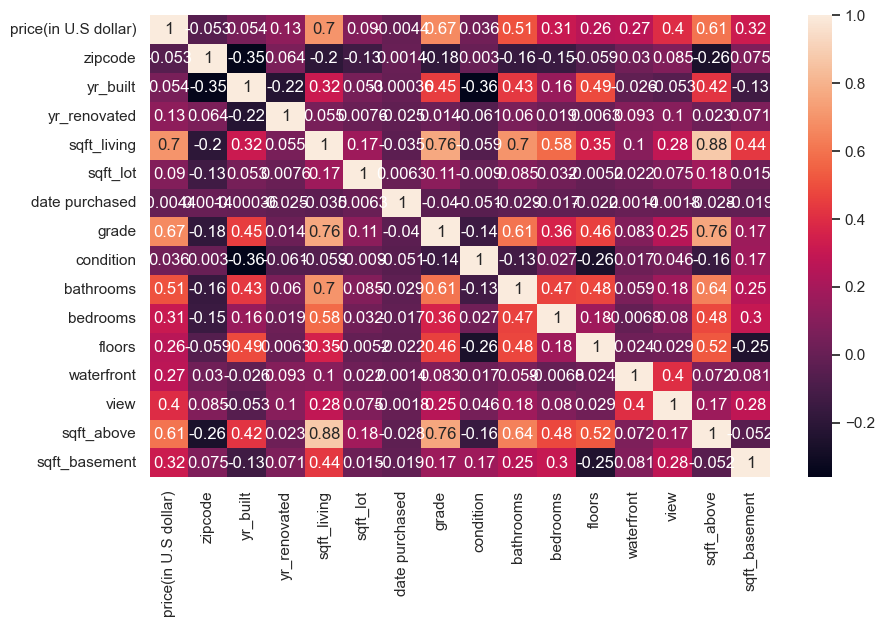

In [253]:
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

From the correlation map above, i see that sqft_living, grade, bathrooms,sqft_above,view have a strong relationship with Price,meaning that they strongly influence the house price, while sqft_basement,bedrooms,floor,yr_renovated and waterfront have a weaker relationship with price.

Apparently, people care about the number bathrooms in the house, more than they do bedroom, interesting...

i'd analyze to see how the price varies across different neigbourhoods in King county

In [254]:
df['zipcode'].duplicated()



0        False
1        False
2        False
3        False
4        False
         ...  
21608     True
21609     True
21610     True
21611     True
21612     True
Name: zipcode, Length: 21613, dtype: bool

There are 70 unique neigbourhoods in King County. What information can these neigbourhoods tell us? Let's find out

In [255]:
unique_count = df['zipcode'].nunique()

print(unique_count)

70


In [256]:
df['price(in U.S dollar)'] = df['price(in U.S dollar)'].round(2)
df['price(in U.S dollar)'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price(in U.S dollar), dtype: float64

whats the average prrice of houses in King County neigbourhoods and which neigbourhoods are the most expensible and most affordable? Let's find out...

In [257]:
avg_price_by_zipcode = df.groupby('zipcode')['price(in U.S dollar)'].mean().sort_values(ascending=False)
avg_price_by_zipcode = avg_price_by_zipcode.round(2)
print(avg_price_by_zipcode)

zipcode
98039    2160606.60
98004    1355927.08
98040    1194230.02
98112    1095499.34
98102     901258.27
            ...    
98148     284908.60
98001     280804.69
98032     251296.24
98168     240328.37
98002     234284.04
Name: price(in U.S dollar), Length: 70, dtype: float64


C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\2389766013.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_zipcode.index, y=avg_price_by_zipcode.values, palette="viridis")


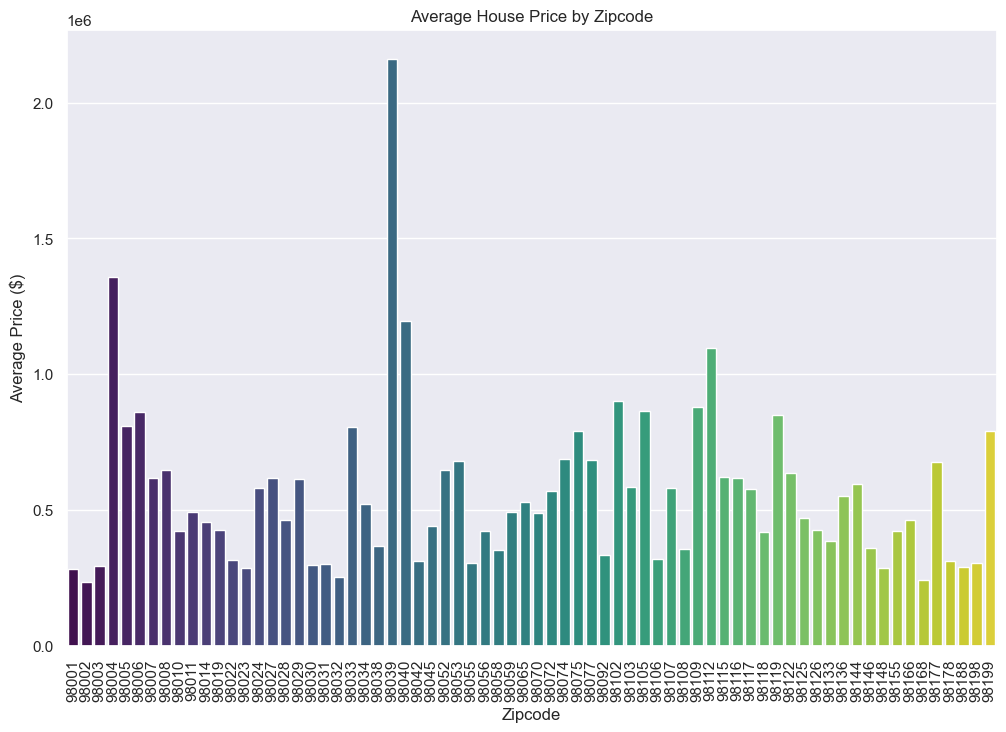

In [313]:
avg_price_by_zipcode = df.groupby('zipcode')['price(in U.S dollar)'].mean()
avg_price_by_zipcode = avg_price_by_zipcode.sort_values()
# Plot
plt.figure(figsize=(12, 8))


sns.barplot(x=avg_price_by_zipcode.index, y=avg_price_by_zipcode.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.title('Average House Price by Zipcode')
plt.show()

From the visualization, we see that Zip code 98039 is the most expensive neigbourhood. It is associated with Medina, a wealthy residential area in King County, Washington, located near Seattle. Also, the most affordable is Auborn, with a zipcode 98002, which costs less than 250k for a house.

I'd sort the visualization to make it more readable

C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\1940989549.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zipcode', y='price(in U.S dollar)', data=avg_price_by_zipcode_df, palette="viridis")


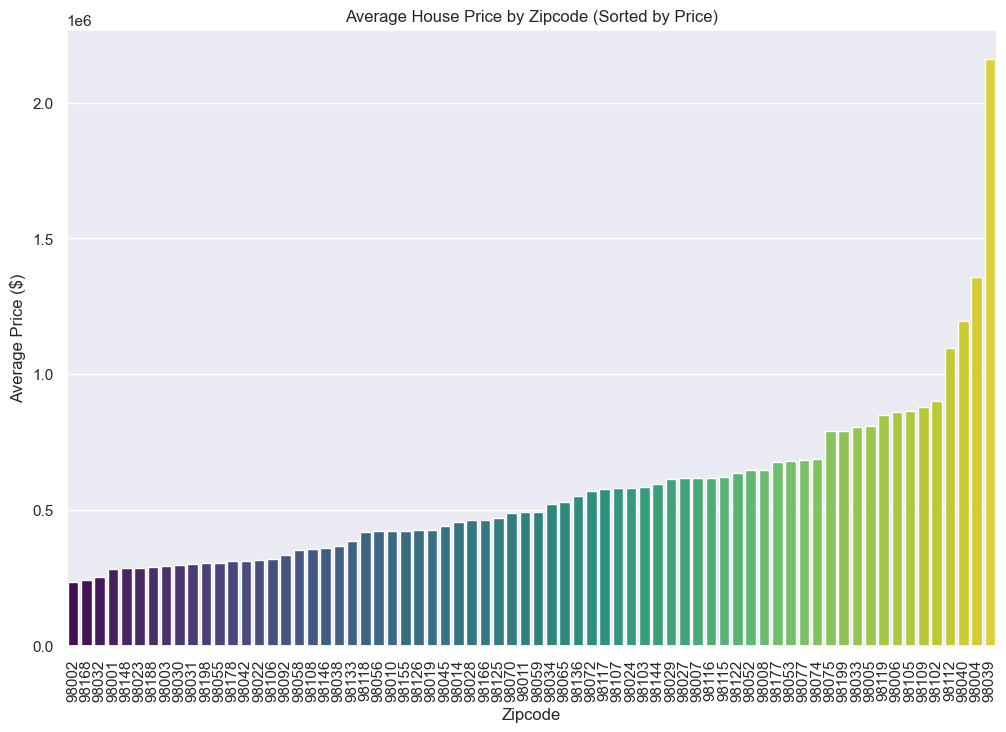

In [79]:
#visualizing the average price of houses in different neigbourhoods

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by zipcode and calculate average price, then sort by average price
avg_price_by_zipcode = df.groupby('zipcode')['price(in U.S dollar)'].mean().sort_values()

# Convert to DataFrame and make zipcode a categorical variable with an ordered index
avg_price_by_zipcode_df = avg_price_by_zipcode.reset_index()
avg_price_by_zipcode_df['zipcode'] = pd.Categorical(avg_price_by_zipcode_df['zipcode'], 
                                                    categories=avg_price_by_zipcode_df['zipcode'], 
                                                    ordered=True)


plt.figure(figsize=(12, 8))
sns.barplot(x='zipcode', y='price(in U.S dollar)', data=avg_price_by_zipcode_df, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.title('Average House Price by Zipcode (Sorted by Price)')
plt.show()

C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\2622453477.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zipcode', y='price(in U.S dollar)', data=top_10_expensive_zipcodes_df, palette="magma")


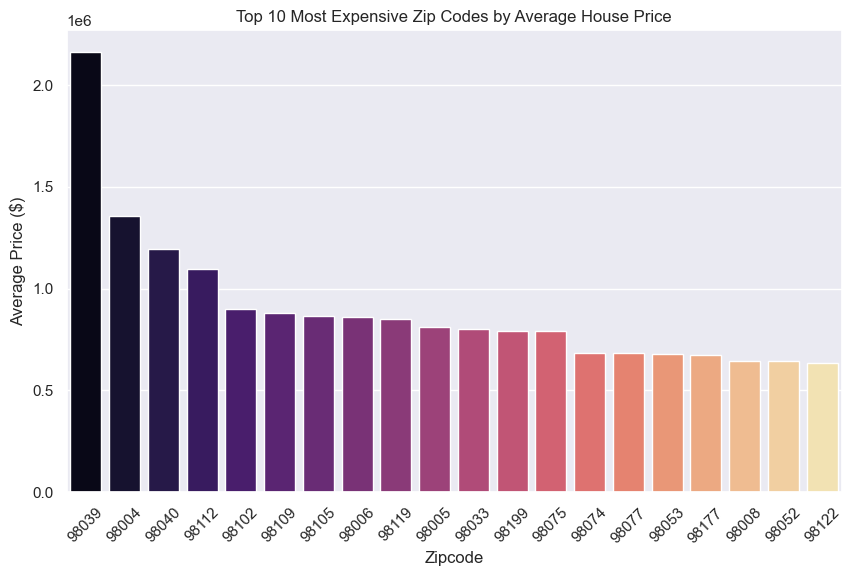

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get top 10 most expensive zip codes, sorted in descending order
top_10_expensive_zipcodes = avg_price_by_zipcode.sort_values(ascending=False).head(20)

# Convert to DataFrame and set zipcode as a categorical variable with an ordered index
top_10_expensive_zipcodes_df = top_10_expensive_zipcodes.reset_index()
top_10_expensive_zipcodes_df['zipcode'] = pd.Categorical(top_10_expensive_zipcodes_df['zipcode'], 
                                                         categories=top_10_expensive_zipcodes_df['zipcode'], 
                                                         ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='zipcode', y='price(in U.S dollar)', data=top_10_expensive_zipcodes_df, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.title('Top 10 Most Expensive Zip Codes by Average House Price')
plt.show()

In [323]:
top_10_expensive_zipcodes = avg_price_by_zipcode.sort_values(ascending=False).head(10)

# Display the result
print(top_10_expensive_zipcodes)

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
98109    8.796236e+05
98105    8.628252e+05
98006    8.596848e+05
98119    8.494480e+05
98005    8.101649e+05
Name: price(in U.S dollar), dtype: float64


From the analysis, the top 10 most expensive neigbourhoods in King county are :
98039 - Medina (with a house costing an average price of 2.16million dollars)
98004 - West Bellevue, Clyde Hill, and parts of Bellevue
98040 - Mercer Island
98112 - Broadmoor, Madison Park, Washington Park
98102 - Eastlake, North Capitol Hill
98109 - Queen Anne, South Lake Union
98105 - University District, Laurelhurst, Roosevelt
98006 - Somerset, Factoria, parts of Bellevue
98119 - Magnolia, Interbay (with a house costing an average price of 810,000 dollars)

In [328]:
top10_expensive_zipcodes = [98039,98004,98040,98112,98102,98109,98105,98006,98119]

# Filter the dataset for only the least expensive zip codes and count the number of houses sold per zip code
houses_sold_in_neighborhoods = df[df['zipcode'].isin(top10_expensive_zipcodes)].groupby('zipcode').size()

# Display the result
print(houses_sold_in_neighborhoods)

zipcode
98004    317
98006    498
98039     50
98040    282
98102    105
98105    229
98109    109
98112    269
98119    184
dtype: int64


In [325]:
top_10_least_expensive_zipcodes = avg_price_by_zipcode.sort_values(ascending=False).tail(10)

# Display the result
print(top_10_least_expensive_zipcodes)

zipcode
98031    300539.890511
98030    296187.980469
98003    294111.278571
98188    289078.345588
98023    286732.791583
98148    284908.596491
98001    280804.690608
98032    251296.240000
98168    240328.371747
98002    234284.035176
Name: price(in U.S dollar), dtype: float64


The most affordable neigbourhoods are: 
98031 - Parts of Kent, East Hill-Meridian (with a house costing an average of 300,539 thousand dollars)
98030 - Kent (central and eastern areas)
98003 - Federal Way (north and central parts)
98188 - SeaTac, parts of Tukwila
98023 - Federal Way (south and west parts)
98148 - Burien, parts of SeaTac
98001 - Parts of Auburn and parts of Federal Way
98032 - Kent (industrial areas, downtown Kent)
98168 - Tukwila, Riverton
98002 - Auburn (central and northern areas) (with a house costing an average of 234,284 thousand dollars)

Soo, if you want to own a house in Kin county but you are on a budget, you know where to look...

In [326]:
least_expensive_zipcodes = [98031, 98030, 98003, 98188, 98023, 98148, 98001, 98032, 98168, 98002]

# Filter the dataset for only the least expensive zip codes and count the number of houses sold per zip code
houses_sold_in_neighborhoods = df[df['zipcode'].isin(least_expensive_zipcodes)].groupby('zipcode').size()

# Display the result
print(houses_sold_in_neighborhoods)

zipcode
98001    362
98002    199
98003    280
98023    499
98030    256
98031    274
98032    125
98148     57
98168    269
98188    136
dtype: int64


C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\264154788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zipcode', y='house_count', data=sorted_by_count, palette="coolwarm")


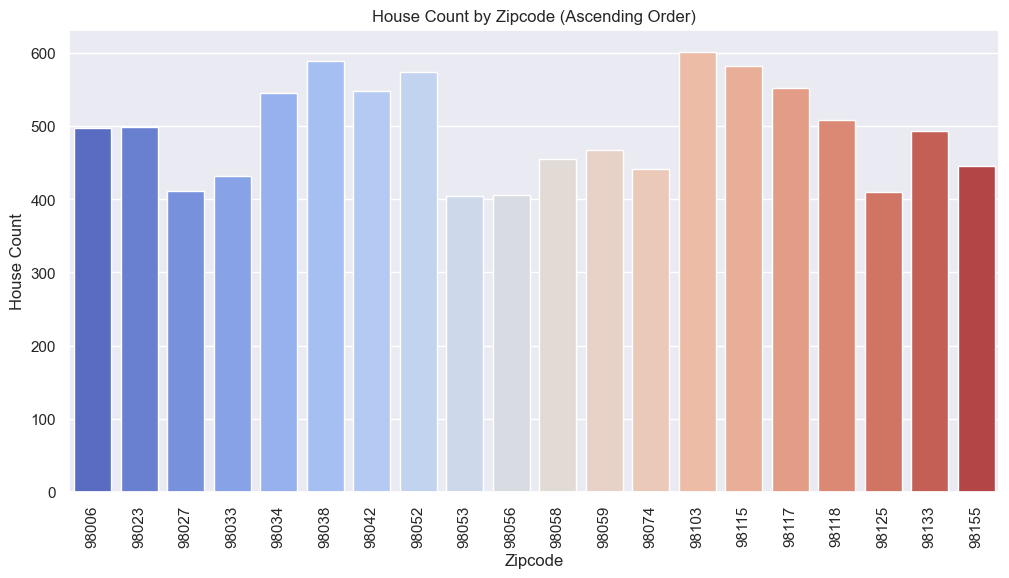

In [262]:

plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='house_count', data=sorted_by_count, palette="coolwarm")


plt.xticks(rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('House Count')
plt.title('House Count by Zipcode (Ascending Order)')

plt.show()


Greenwood neigbourhood with a zipcode 98103 has the highest number of house sales (602) in King county. What factors could have contributed to this. Lets find out...

In [263]:
house_count_by_zipcode = df['zipcode'].value_counts()

print(house_count_by_zipcode)

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64


In [264]:
#correlation between house price and size

print(df[['price(in U.S dollar)', 'sqft_living']].head())

correlation = df['price(in U.S dollar)'].corr(df['sqft_living'])
print(f'Correlation between Price and Sqft_living: {correlation}')


   price(in U.S dollar)  sqft_living
0              221900.0         1180
1              538000.0         2570
2              180000.0          770
3              604000.0         1960
4              510000.0         1680
Correlation between Price and Sqft_living: 0.7020350546118003


In [265]:
print(df[['price(in U.S dollar)', 'sqft_lot']].head())

correlation = df['price(in U.S dollar)'].corr(df['sqft_lot'])
print(f'Correlation between Price and Sqft_lot: {correlation}')


   price(in U.S dollar)  sqft_lot
0              221900.0      5650
1              538000.0      7242
2              180000.0     10000
3              604000.0      5000
4              510000.0      8080
Correlation between Price and Sqft_lot: 0.08966086058710011


There is barely a corelation between the sqftlot and price, unlike the sqft_living and price, meaning that the sqft_lot of the houses do  not influence their prices.

In [266]:
df.columns

Index(['price(in U.S dollar)', 'zipcode', 'yr_built', 'yr_renovated',
       'sqft_living', 'sqft_lot', 'date purchased', 'grade', 'condition',
       'bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'sqft_above',
       'sqft_basement'],
      dtype='object')

How do waterfront properties compare in price to non-waterfront properties?

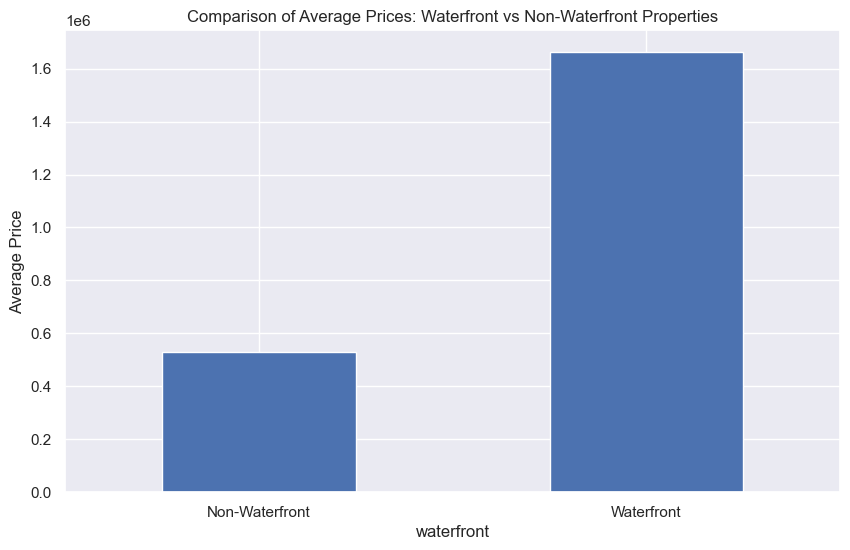

In [267]:
waterfront_comparison = df.groupby('waterfront')['price(in U.S dollar)'].mean()

import matplotlib.pyplot as plt

# Plotting the price comparison
waterfront_comparison.plot(kind='bar')
plt.title('Comparison of Average Prices: Waterfront vs Non-Waterfront Properties')
plt.ylabel('Average Price')
plt.xticks([0, 1], ['Non-Waterfront', 'Waterfront'], rotation=0)
plt.show()

### Analysis Question 2 #Time_series_Analysis:
How have house prices in King County changed over time?
Is there a seasonal trend in house sales (e.g., more sales in summer versus winter)?
Location-Based Insights

In [268]:
#df[['yr_built', 'yr_renovated','date purchased']]

house_count_per_year = df['yr_built'].value_counts()

print(df['yr_built'],house_count_per_year)

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64 yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64


In [269]:
houses_per_year = df['yr_built'].value_counts().sort_index()

houses_per_year_df = houses_per_year.reset_index()
houses_per_year_df.columns = ['yr_built', 'Number_of_houses']


print(houses_per_year_df)
houses_per_year_df.tail()
#houses_per_year_df.head()

     yr_built  Number_of_houses
0        1900                87
1        1901                29
2        1902                27
3        1903                46
4        1904                45
..        ...               ...
111      2011               130
112      2012               170
113      2013               201
114      2014               559
115      2015                38

[116 rows x 2 columns]


,yr_built,Number_of_houses
111,2011,130
112,2012,170
113,2013,201
114,2014,559
115,2015,38


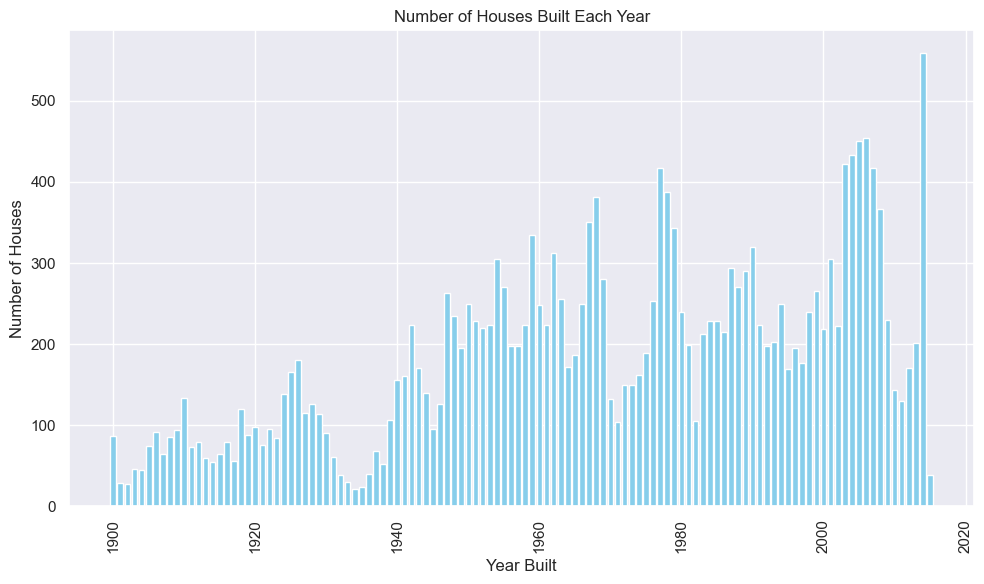

In [270]:
plt.figure(figsize=(10, 6))
plt.bar(houses_per_year_df['yr_built'], houses_per_year_df['Number_of_houses'], color='skyblue')
plt.title('Number of Houses Built Each Year')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

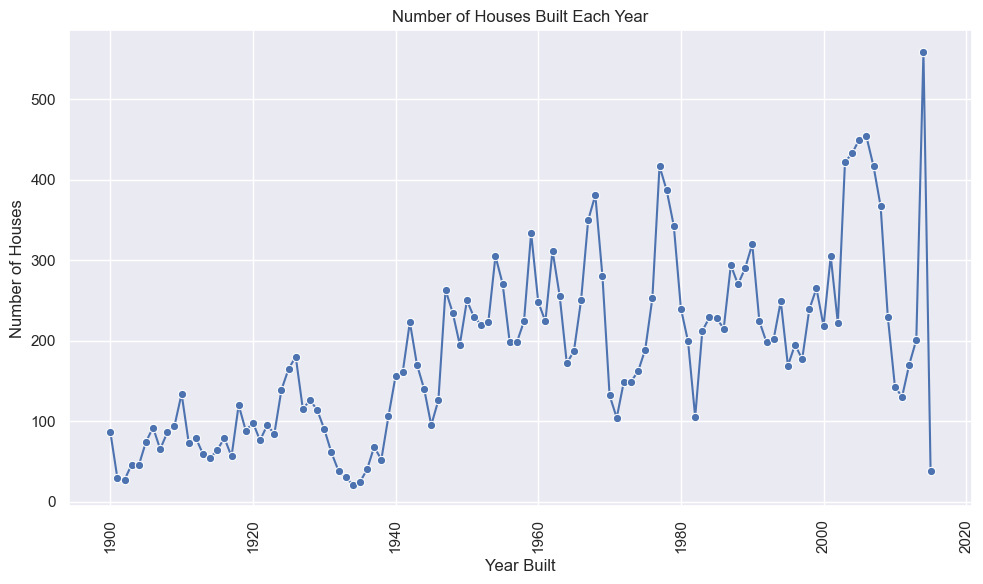

In [271]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_built', y='Number_of_houses', data=houses_per_year_df, marker='o')
plt.title('Number of Houses Built Each Year')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [272]:
specific_year = 2015 
count = df[df['yr_built'] == specific_year].shape[0]
print(f'Number of houses built in {specific_year}: {count}')

Number of houses built in 2015: 38


The most houses were  built in 2014 and there was a drastic decline in the next year. What happened?

In [273]:
#date_purchased = df['date purchased']==2015
#ate_purchased.head()

In [274]:
houses_per_year = df['date purchased'].value_counts().sort_index()

houses_per_year_df = houses_per_year.reset_index()
houses_per_year_df.columns = ['date purchased', 'Number_of_houses']


print(houses_per_year_df)
houses_per_year_df.tail()


    date purchased  Number_of_houses
0       2014-05-02                67
1       2014-05-03                 4
2       2014-05-04                 5
3       2014-05-05                84
4       2014-05-06                83
..             ...               ...
367     2015-05-13                31
368     2015-05-14                11
369     2015-05-15                 1
370     2015-05-24                 1
371     2015-05-27                 1

[372 rows x 2 columns]


,date purchased,Number_of_houses
367,2015-05-13,31
368,2015-05-14,11
369,2015-05-15,1
370,2015-05-24,1
371,2015-05-27,1


Looks like our dataset covers house purchased between 2014 and 2015.How does the house sale compare between the 2 years? Are there months or seasons that sell more than the rest?

In [275]:
df['date purchased'] = pd.to_datetime(df['date purchased'])

In [276]:
df_2014 = df[df['date purchased'].dt.year == 2014]
df_2015 = df[df['date purchased'].dt.year == 2015]

In [277]:
df_2014.head()

,price(in U.S dollar),zipcode,yr_built,yr_renovated,sqft_living,sqft_lot,date purchased,grade,condition,bathrooms,bedrooms,floors,waterfront,view,sqft_above,sqft_basement
0,221900.0,98178,1955,0,1180,5650,2014-10-13,7,3,1,3,1.0,0,0,1180,0
1,538000.0,98125,1951,1991,2570,7242,2014-12-09,7,3,2,3,2.0,0,0,2170,400
3,604000.0,98136,1965,0,1960,5000,2014-12-09,7,5,3,4,1.0,0,0,1050,910
5,1225000.0,98053,2001,0,5420,101930,2014-05-12,11,3,4,4,1.0,0,0,3890,1530
6,257500.0,98003,1995,0,1715,6819,2014-06-27,7,3,2,3,2.0,0,0,1715,0


In [278]:
purchases_2014 = df_2014.shape[0]
purchases_2015 = df_2015.shape[0]

print(f"Number of houses purchased in 2014: {purchases_2014}")
print(f"Number of houses purchased in 2015: {purchases_2015}")

Number of houses purchased in 2014: 14633
Number of houses purchased in 2015: 6980


In [279]:
total_price_2014 = df_2014['price(in U.S dollar)'].sum()
total_price_2015 = df_2015['price(in U.S dollar)'].sum()

# Average price comparison
avg_price_2014 = df_2014['price(in U.S dollar)'].mean()
avg_price_2015 = df_2015['price(in U.S dollar)'].mean()

print(f"Total house prices in 2014: {total_price_2014}")
print(f"Total house prices in 2015: {total_price_2015}")
print(f"Average house price in 2014: {avg_price_2014}")
print(f"Average house price in 2015: {avg_price_2015}")



Total house prices in 2014: 7889841842.0
Total house prices in 2015: 3783083166.0
Average house price in 2014: 539181.4284152258
Average house price in 2015: 541988.9922636104


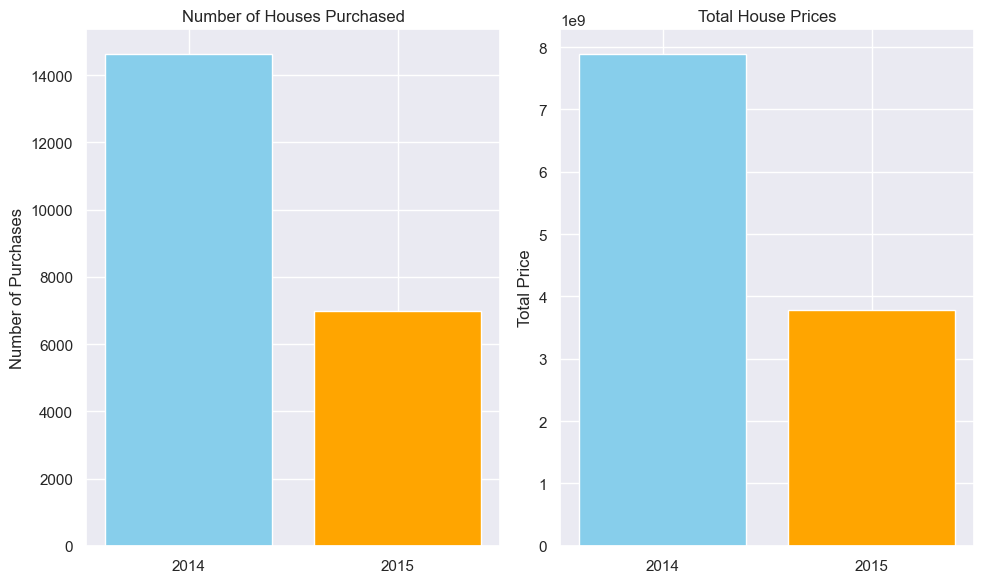

In [282]:

# Data for visualization
years = ['2014', '2015']
total_purchases = [purchases_2014, purchases_2015]
total_prices = [total_price_2014, total_price_2015]
avg_prices = [avg_price_2014,avg_price_2015]

# Plot the number of purchases
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(years, total_purchases, color=['skyblue', 'orange'])
plt.title('Number of Houses Purchased')
plt.ylabel('Number of Purchases')

# Plot the average prices
plt.subplot(1, 2, 2)
plt.bar(years, total_prices, color=['skyblue', 'orange'])
plt.title('Total House Prices')
plt.ylabel('Total Price')

plt.tight_layout()
plt.show()

As can be seen from the chart above, in 2014 , alot more houses were sold and twice the amount generated in 2015 was generated in 2014. Is there a special reason for this? Let's break down our analysis further to see house sales monthly...

In [293]:
# Extracting month from date
df_2014['Month'] = df_2014['date purchased'].dt.month

# Calculating total sales per month
monthly_sales = df_2014.groupby('Month')['price(in U.S dollar)'].sum().reset_index()
monthly_sales_count = df_2014.groupby('Month')['date purchased'].count().reset_index()
# Renaming columns for clarity
monthly_sales.columns = ['Month', 'Total_Sales']
print(monthly_sales)

   Month   Total_Sales
0      5  9.690059e+08
1      6  1.216445e+09
2      7  1.204528e+09
3      8  1.040704e+09
4      9  9.388963e+08
5     10  1.012293e+09
6     11  7.364870e+08
7     12  7.714834e+08


C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\1970043349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Month'] = df_2014['date purchased'].dt.month


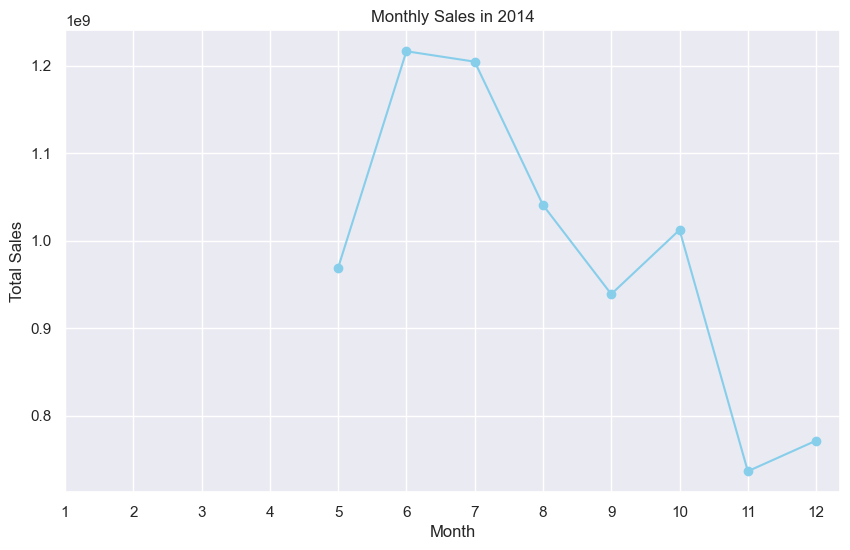

In [300]:

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total_Sales'], marker='o', color='skyblue', linestyle='-')
plt.title('Monthly Sales in 2014')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Ensures all months from 1 to 12 are shown
plt.grid(True)
plt.show()

In [288]:
# Extracting month from date for 2015
df_2015['Month'] = df_2015['date purchased'].dt.month

# Calculating total sales per month
monthly_sale = df_2015.groupby('Month')['price(in U.S dollar)'].sum().reset_index()

# Renaming columns for clarity
monthly_sale.columns = ['Month', 'Total_Sales']
print(monthly_sale)

   Month   Total_Sales
0      1  5.143017e+08
1      2  6.348142e+08
2      3  1.019957e+09
3      4  1.253460e+09
4      5  3.605499e+08


C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\2376419594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Month'] = df_2015['date purchased'].dt.month


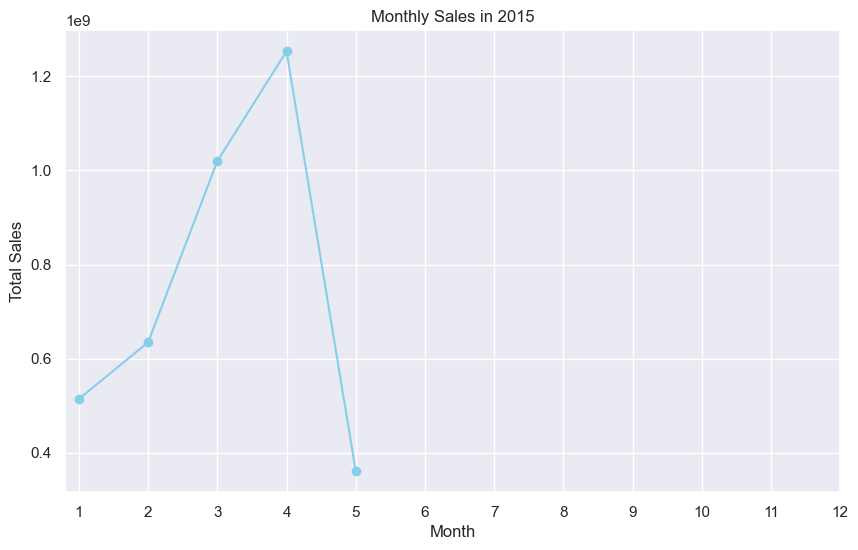

In [289]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sale['Month'], monthly_sale['Total_Sales'], marker='o', color='skyblue', linestyle='-')
plt.title('Monthly Sales in 2015')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Ensures all months from 1 to 12 are shown
plt.grid(True)
plt.show()

Now i see the issue, In 2014, our dataset covers the record for 8 months (May till July), but just 5 in 2015 (January to May).There was a drastic rise in house sales in May, 2024 and a sudden decline in August. This could be because of a seasonal demand (late spring amd early summer surges), Economic or market changes, local market trends in King county or even external factors. However, we do not have sufficient data to further investigate this. Also there was a massive decline in house sales for the month of May,2015. 

### Analysis Question 3: Features Analysis
How does the features/characteristics of the houses influence house sales and house price?

In [303]:
df.columns

Index(['price(in U.S dollar)', 'zipcode', 'yr_built', 'yr_renovated',
       'sqft_living', 'sqft_lot', 'date purchased', 'grade', 'condition',
       'bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'Month'],
      dtype='object')

In [338]:
#Let's start with the year built? Do older houses sell of faster than newer ones?

houses_sold_by_year_built = df.groupby('yr_built').size()
houses_sold_by_year_built.head(50)



yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
1905     74
1906     92
1907     65
1908     86
1909     94
1910    134
1911     73
1912     79
1913     59
1914     54
1915     64
1916     79
1917     56
1918    120
1919     88
1920     98
1921     76
1922     95
1923     84
1924    139
1925    165
1926    180
1927    115
1928    126
1929    114
1930     90
1931     61
1932     38
1933     30
1934     21
1935     24
1936     40
1937     68
1938     52
1939    106
1940    156
1941    161
1942    223
1943    170
1944    140
1945     95
1946    126
1947    263
1948    235
1949    195
dtype: int64

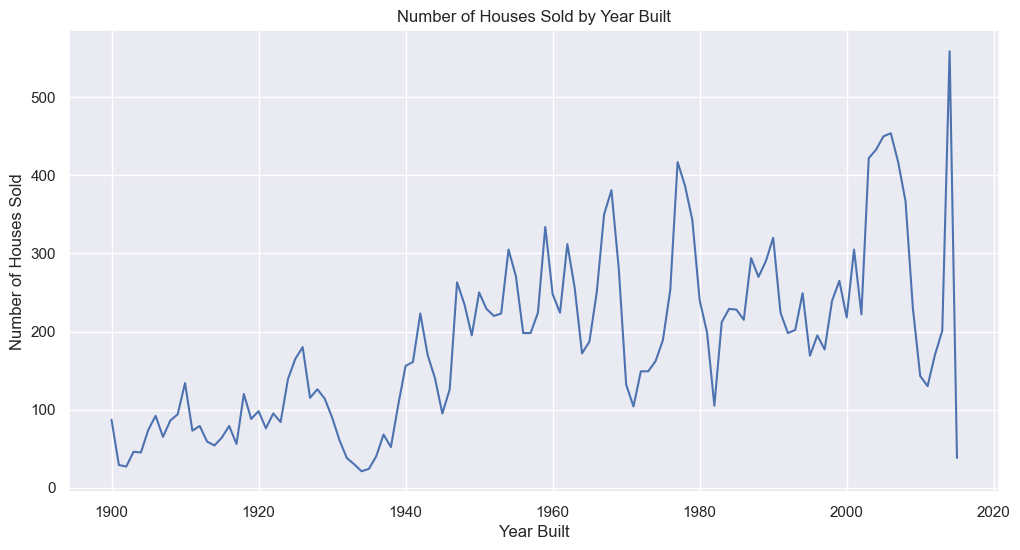

In [336]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=houses_sold_by_year_built.index, y=houses_sold_by_year_built.values)
plt.xlabel('Year Built')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold by Year Built')
plt.show()

In [340]:
houses_sold_by_year_built.tail()

yr_built
2011    130
2012    170
2013    201
2014    559
2015     38
dtype: int64

The analysis shows that the year the house was built positively affects the number of houses sold, as the number of houses sold increases the more recently the house was built, with houses built in 2014 pulling off the most sales.

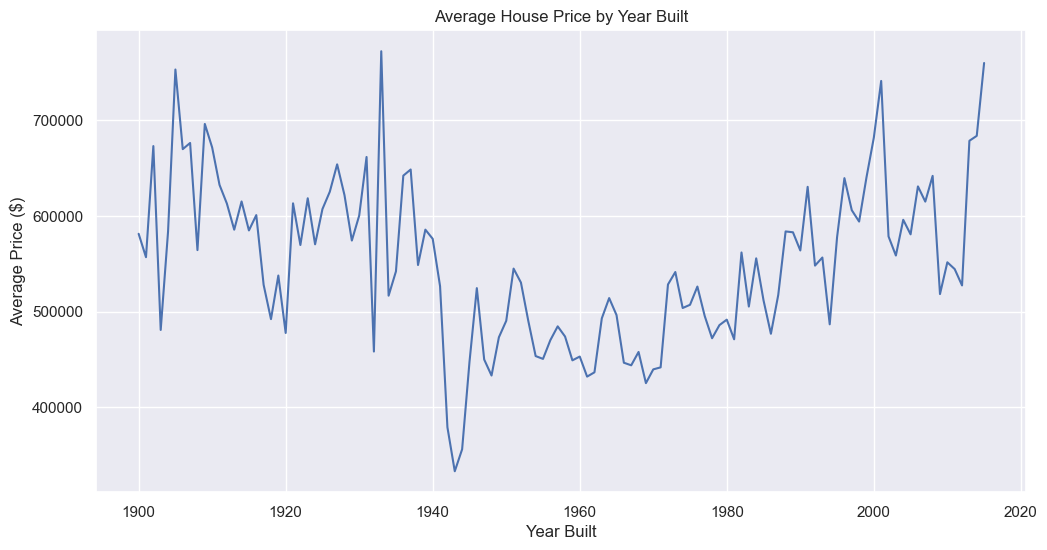

In [350]:
# Calculate average price for each year built
avg_price_by_year_built = df.groupby('yr_built')['price(in U.S dollar)'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_year_built.index, y=avg_price_by_year_built.values)
plt.xlabel('Year Built')
plt.ylabel('Average Price ($)')
plt.title('Average House Price by Year Built')
plt.show()

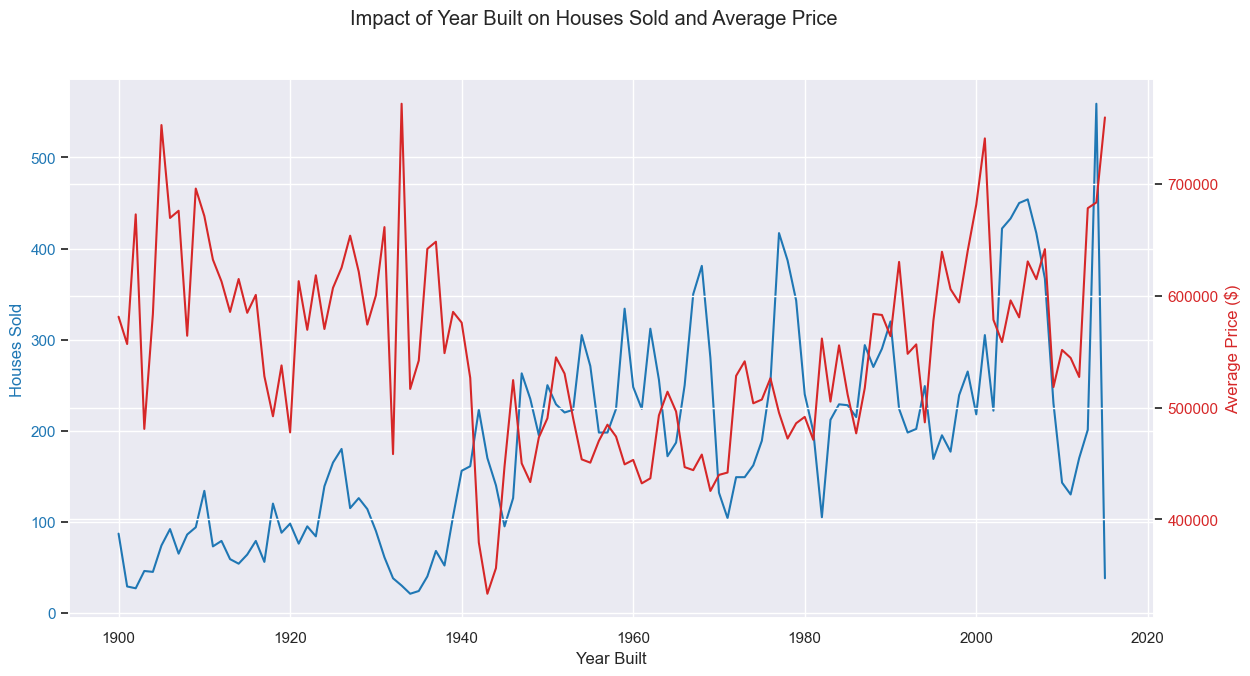

In [351]:
# Combine data into a single DataFrame
analysis_df = pd.DataFrame({
    'Houses Sold': houses_sold_by_year_built,
    'Average Price': avg_price_by_year_built
}).dropna()

# Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Houses Sold on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year Built')
ax1.set_ylabel('Houses Sold', color=color)
ax1.plot(analysis_df.index, analysis_df['Houses Sold'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot Average Price on secondary y-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Price ($)', color=color)
ax2.plot(analysis_df.index, analysis_df['Average Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Impact of Year Built on Houses Sold and Average Price')
plt.show()


In [352]:
houses_sold_by_year_renovated = df.groupby('grade').size()
houses_sold_by_year_renovated

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
dtype: int64

In [354]:
houses_sold_by_year_renovated = df.groupby('condition').size()
houses_sold_by_year_renovated

condition
1       30
2      172
3    14031
4     5679
5     1701
dtype: int64

The grade rating typically assesses the overall construction quality and design of a home. It generally follows a scale from 1 to 13, while the condition rating evaluates the current physical state of the home, such as wear and maintenance. This rating typically ranges from 1 to 5. TGhe analysis shows that houses in average and above average grade and condiitions sell out more than those in the best or worst conditions.

C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\3172912400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=houses_sold_by_bathrooms.index, y=houses_sold_by_bathrooms.values, palette="viridis")


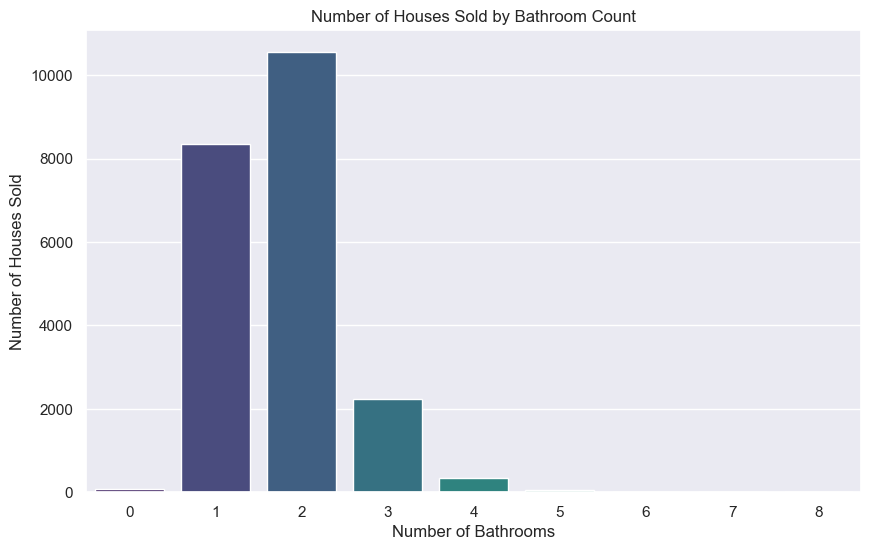

In [355]:
houses_sold_by_bathrooms = df.groupby('bathrooms').size()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=houses_sold_by_bathrooms.index, y=houses_sold_by_bathrooms.values, palette="viridis")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold by Bathroom Count')
plt.show()

C:\Users\chisom\AppData\Local\Temp\ipykernel_7392\1222878221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=houses_sold_by_bedrooms.index, y=houses_sold_by_bedrooms.values, palette="viridis")


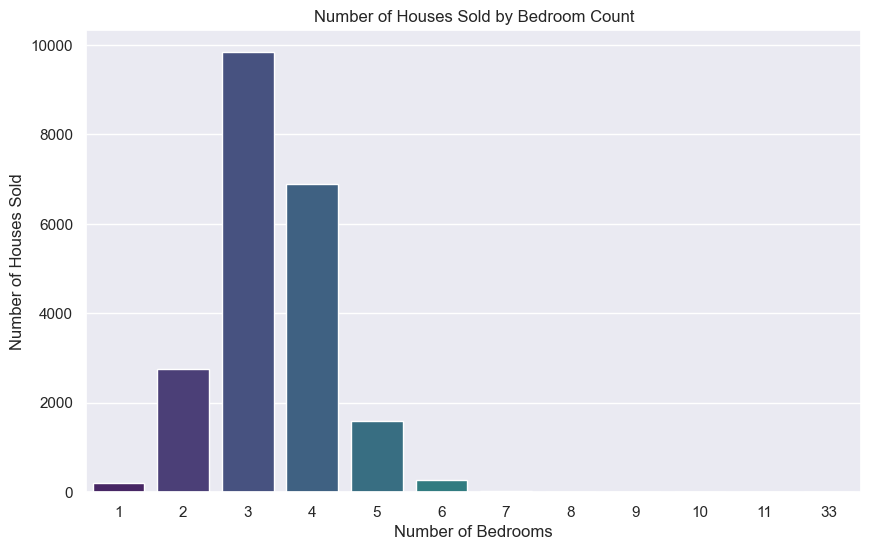

In [356]:
# Count the number of houses sold by bedroom count
houses_sold_by_bedrooms = df.groupby('bedrooms').size()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=houses_sold_by_bedrooms.index, y=houses_sold_by_bedrooms.values, palette="viridis")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold by Bedroom Count')
plt.show()


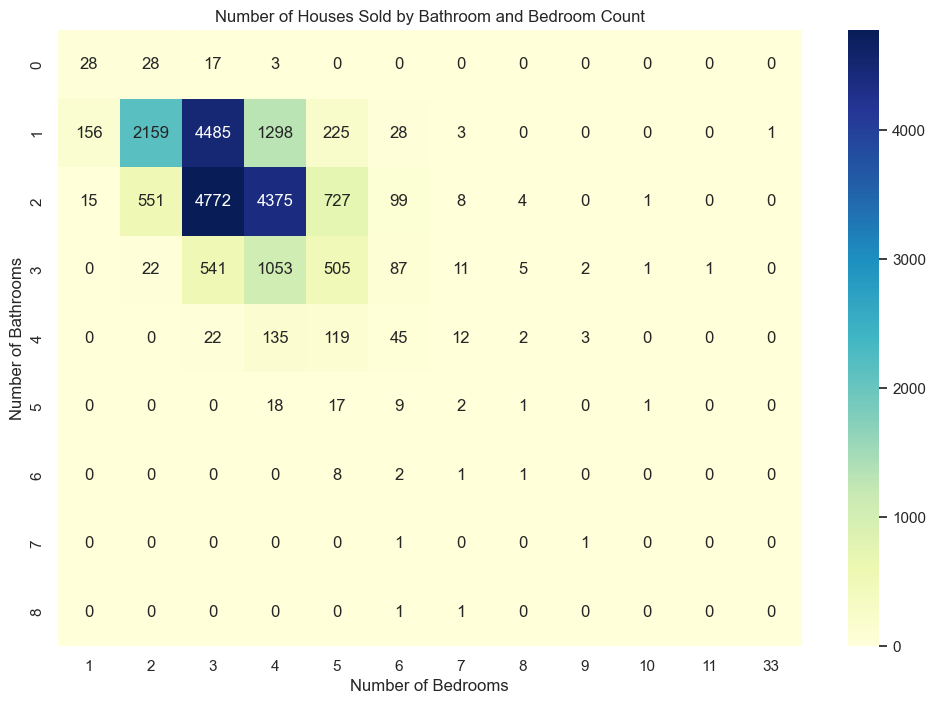

In [357]:
# Create a pivot table for bedrooms and bathrooms vs houses sold count
bath_bed_sold = df.groupby(['bathrooms', 'bedrooms']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bath_bed_sold, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('Number of Houses Sold by Bathroom and Bedroom Count')
plt.show()


In [361]:
houses_sold_by_waterfront = df.groupby('waterfront').size()
houses_sold_by_waterfront


waterfront
0    21450
1      163
dtype: int64

In [ ]:
houses_sold_by_view = df.groupby('view').size()


In [362]:
houses_sold_by_view = df.groupby('view').size()
houses_sold_by_view

# 0 view signifies houses with no scenic view and 4 signifies houses with the best cinematic views. Apparently, houses with no views and waterfronts sell out alot faster

view
0    19489
1      332
2      963
3      510
4      319
dtype: int64

### Conclusion

#### Objective Recap

This analysis set out to understand what drives housing prices and sales trends across different neighborhoods in King County. By examining factors like property size, location, grade, and view, we aimed to uncover patterns and gain insights into the local housing market.

#### Key Findings

Our findings highlighted some clear trends: waterfront properties and homes with premium views consistently fetched higher prices. Expensive neighborhoods, particularly zip codes like 98039 and 98004, emerged as top-tier areas, commanding much of the high-end market. Features such as square footage, the number of bathrooms, and overall construction quality were also key influencers on pricing, showing just how important spacious, well-built homes are to buyers.

#### Limitations

Despite these insights, a few limitations stand out. This analysis was based on data from 2014 to 2015, which doesn’t account for any market changes or recent renovations that might affect prices today. Proximity to popular amenities and other external factors were also not considered, which could add more context to the pricing landscape.

#### Recommendations

In future analyses, adding more recent data along with factors like economic indicators or nearby amenities would give a fuller picture of the King County market. Predictive modeling could also help estimate future prices, offering practical value for both real estate investment and property valuation.

Ultimately, this analysis emphasizes just how much location and property features shape housing prices in King County, laying a foundation for data-driven decisions in real estate.

Thank you for checking out my project.... Be on the look out as i'd be working on another shortly!



